# 0. Setting Up The Data

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
df = breast_cancer_wisconsin_diagnostic.data.original 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

# 1. Business Understanding

**Problem:** Predict if a breast cancer tumor is malignant or benign based on diagnostic measurements.  
**Objective:** Learn to apply the kNN algorithm to classify tumors and evaluate performance.

# 2. Data Understanding

In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry1,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


The dataset contains 569 instances and 32 columns:
- ID: Unique identifier
- Diagnosis: Target variable (M = Malignant, B = Beningn)
- 30 numeric features: measurements of breast tumors

**Observations:**
- No null values
- Distribution: 212 malignant, 357 benign.
- Values are not normalized

# 3. Data Preparation

In [4]:
# Drop ID column
df = df.drop(columns=["ID"])

# Map diagnosis to binary values: Malignant = 1, Benign = 0
df["Diagnosis"] = df["Diagnosis"].map({"M":1, "B":0})

# Split features and target variable
features = df.drop(columns=["Diagnosis"])
labels = df["Diagnosis"]

# Normalize features
features = (features - features.mean()) / features.std()

# Display summary statistics of features
features.describe().T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,-1.311195e-16,1.0,-2.027864,-0.688779,-0.214893,0.468980,3.967796
texture1,569.0,6.243785e-17,1.0,-2.227289,-0.725325,-0.104544,0.583662,4.647799
perimeter1,569.0,-1.248757e-16,1.0,-1.982759,-0.691347,-0.235773,0.499238,3.972634
area1,569.0,-2.185325e-16,1.0,-1.453164,-0.666609,-0.294927,0.363188,5.245913
smoothness1,569.0,-8.366672e-16,1.0,-3.109349,-0.710338,-0.034860,0.635640,4.766717
compactness1,569.0,1.998011e-16,1.0,-1.608721,-0.746429,-0.221745,0.493423,4.564409
concavity1,569.0,3.746271e-17,1.0,-1.113893,-0.743094,-0.341939,0.525599,4.239858
concave_points1,569.0,-4.995028e-17,1.0,-1.260710,-0.737295,-0.397372,0.646366,3.924477
symmetry1,569.0,1.748260e-16,1.0,-2.741705,-0.702621,-0.071564,0.530313,4.480808
fractal_dimension1,569.0,4.838933e-16,1.0,-1.818265,-0.722004,-0.178123,0.470569,4.906602


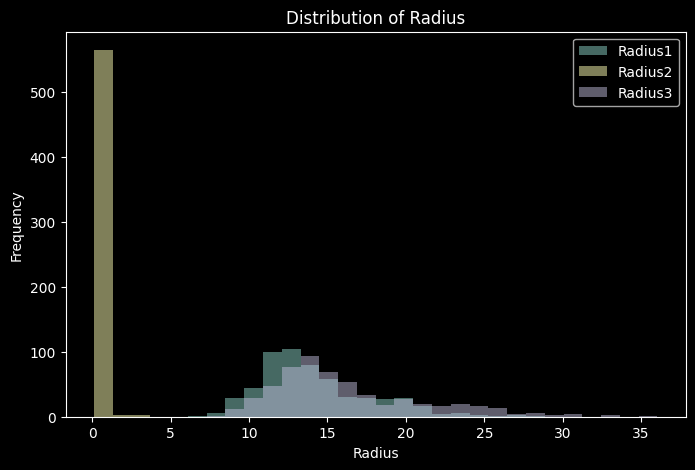

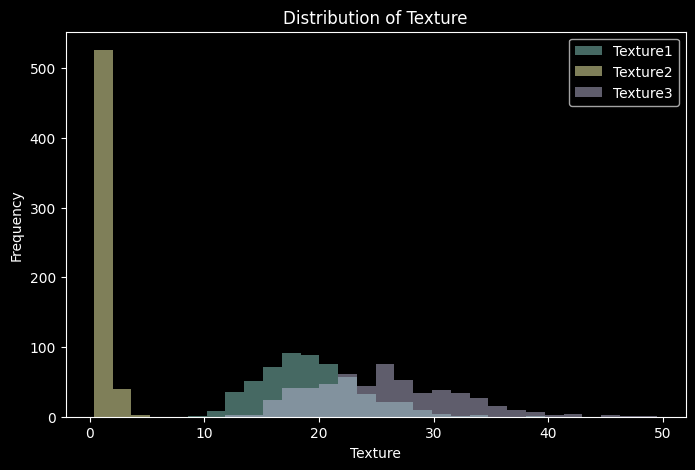

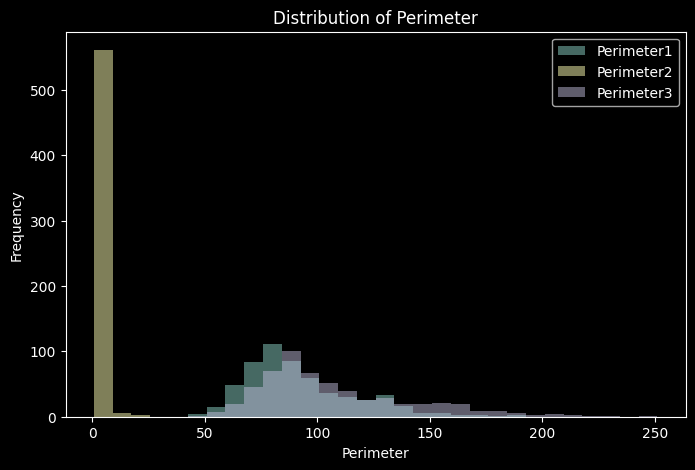

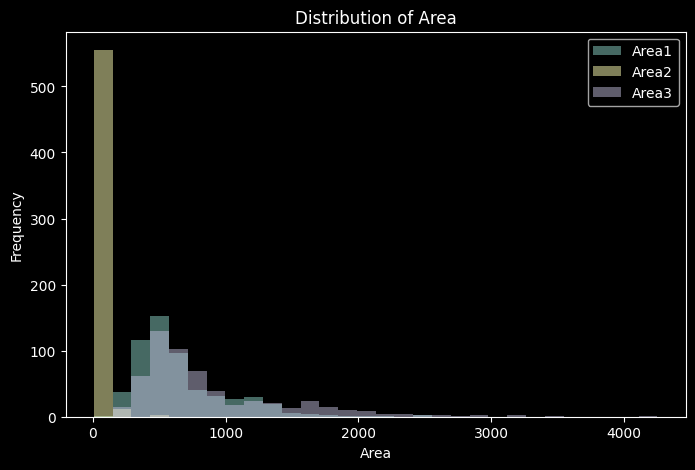

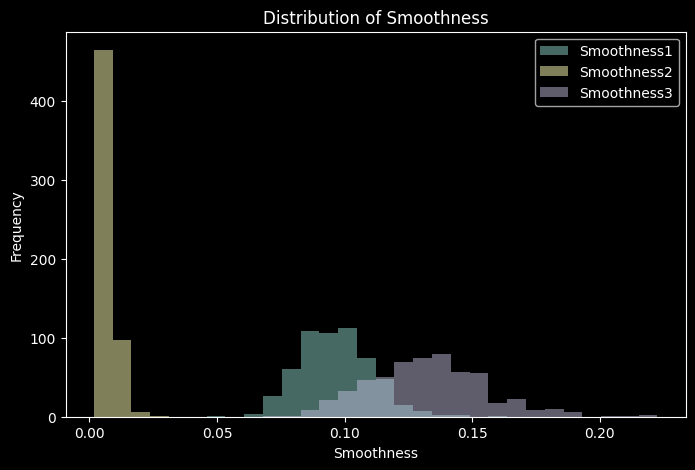

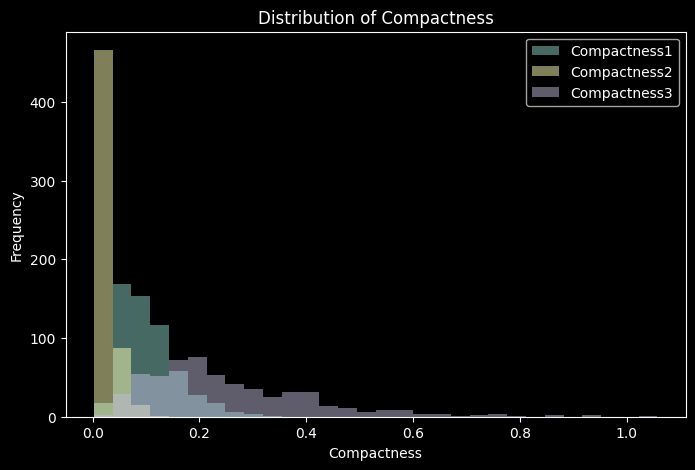

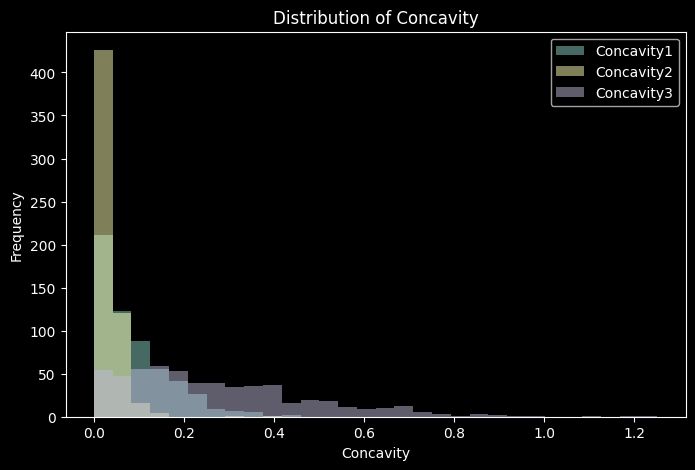

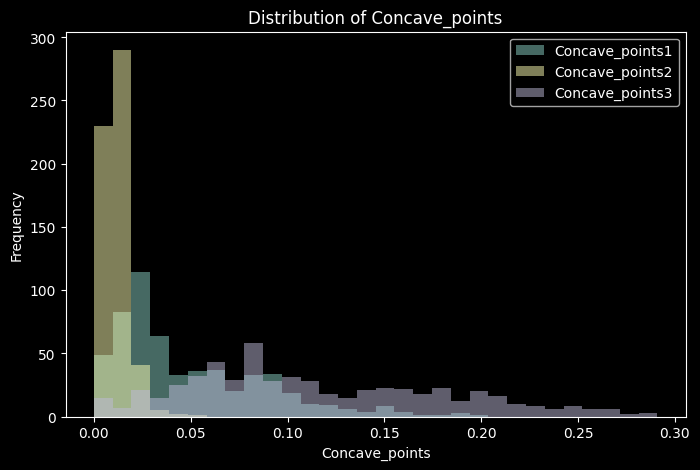

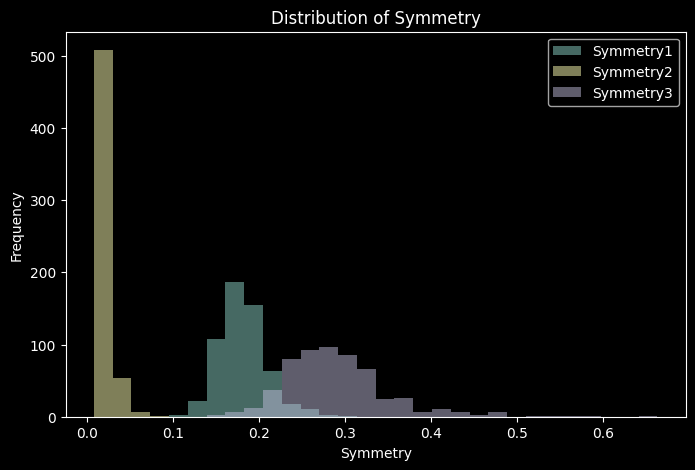

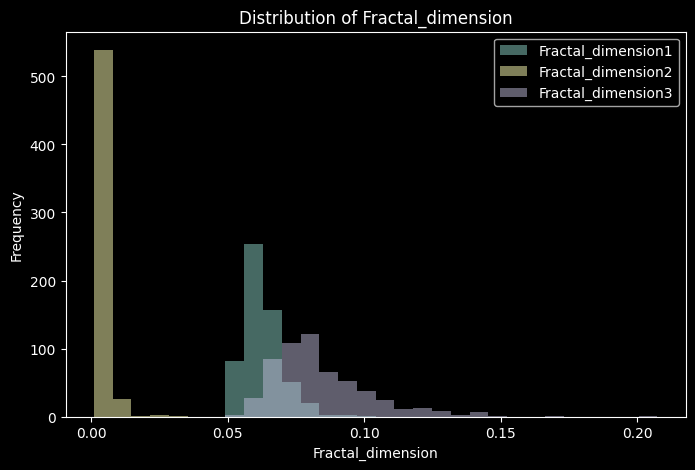

In [5]:
import matplotlib.pyplot as plt

features_gr = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

for feature in features_gr:
    cols = [f"{feature}1", f"{feature}2", f"{feature}3"]
    df_subset = df[cols].copy()
    df_subset.columns = [f"{feature.capitalize()}1", f"{feature.capitalize()}2", f"{feature.capitalize()}3"]
    
    df_subset.plot(kind='hist', bins=30, alpha=0.5, figsize=(8,5),
                   title=f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.show()


# 4. Modeling

### Data splitting
The data is split into three sets using the hold-out validation technique:
- Training Set: 60% of the data for training the classifier
- Validation Set: 20% to select the best hyperparameter k value
- Test Set: 20% to evaluate the final model performance

Stratified sampling is used to maintain class distribution across all sets.

In [6]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    random_state=42,
    stratify=y_temp
)

In [7]:
X_train.shape, X_val.shape, X_test.shape

((341, 30), (114, 30), (114, 30))

The training set contains 341 instances, the validation set 114 instances, and the test set 114 instances which confirms the 60-20-20 split.

### Hyperparameter Tuning
We will train kNN classifiers with different odd values of k (from 1 to 21) and evaluate their accuracy on the validation set to select the best model configuration.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

k_values = range(1, 22, 2)

results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    results.append({
        "k": k,
        "Validation Accuracy": val_accuracy
    })

results_df = pd.DataFrame(results)
results_df.sort_values("Validation Accuracy", ascending=False)

,k,Validation Accuracy
2,5,0.973684
4,9,0.973684
3,7,0.973684
7,15,0.973684
8,17,0.973684
5,11,0.973684
6,13,0.973684
9,19,0.973684
1,3,0.964912
10,21,0.964912


The validation results indicate that multiple k values result in the same highest accuracy. The smallest k is selected to favor a simpler model.

In [9]:
best_k = results_df.loc[results_df["Validation Accuracy"].idxmax(), "k"]

print("Best k =", best_k)

Best k = 5


# 5. Evaluation

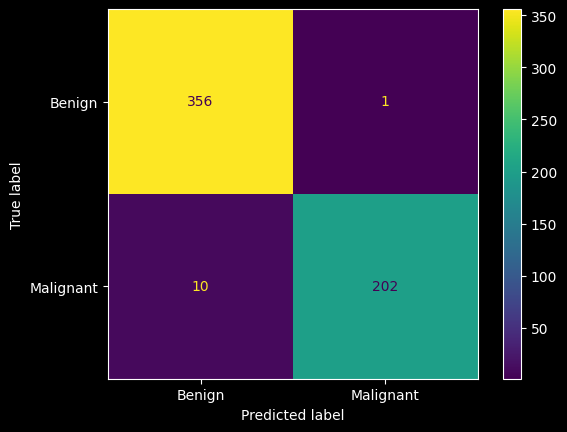

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = KNeighborsClassifier(n_neighbors = best_k)
model.fit(features, labels)

labels_pred = model.predict(features)
cm = confusion_matrix(labels, labels_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Benign", "Malignant"])
cmd.plot()

One malignant tumor erroneously identified as benign and 10 benign tumors as malignant.


In [11]:
accuracy = (356+202) / (569)
precision_be = (356) / (356 + 10)
precision_mal = (202) / (202+1)
recall_be = 356 / 357
recall_mal = 202 / 212

print(accuracy)
print(precision_be)
print(precision_mal)
print(recall_be)
print(recall_mal)

0.9806678383128296
0.9726775956284153
0.9950738916256158
0.9971988795518207
0.9528301886792453


Accuracy of the model is 356 correctly identified benign tumors and 202 malignant tumors, divided by the full amount in the dataset: 569.
This rounds to 98,1% accuracy.
Precision for benign detection is the correctly identified 356 tumors divided by that amount in addition with the incorrectly benign attributed malignant tumors, which rounds to 97,3%
Precision for the malignat tumors following same principle rounds to 99,5%
Recall for the benign tumors is the correctly identified 356 tumors divided by all the designated bening tumors in the dataset which rounds to 99,7%
Recall for the malignant tumors rounds to 95,3%

# 6. Deployment

The completed model displays some potential in being able to detect nature of a tumor by its physical dimensions.
However the model seems to have a slight bias towards designating its inputs towards benign.
Both recall for malignant tumors and precision in determing benign tumors are considerably lower when compared to other statistics in the model.
The dataset provided is substantive enough in quantity that we can consider this as statistically significant, and thus the model is not suited